## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Find no.of samples are there in training and test datasets

In [0]:
# number of elelements in numpy shape.
# no. images height and width

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

### Find dimensions of an image in the dataset

In [10]:
x_train.ndim

3

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
# one hot encoding so that CNN doesnot learn lables

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10, dtype = "float32")
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10 , dtype = "float32")

In [14]:
 print("Shape of data (AFTER encode) for y_train %s and for y_test %s" % (str(y_train.shape), str(y_test.shape)))

Shape of data (AFTER encode) for y_train (60000, 10) and for y_test (10000, 10)


### Normalize both the train and test image data from 0-255 to 0-1

In [15]:
print(x_train.dtype, x_test.dtype)

uint8 uint8


In [0]:
x_test = x_test.astype("float32")

In [0]:
x_train = x_train.astype("float32")

In [18]:
print(x_train.dtype, x_test.dtype)

float32 float32


In [0]:
# pixel 0- 255 to be normalised divide by /255
x_test = x_test/255
x_train = x_train/255

In [20]:
print (x_test.shape)
print (x_train.shape)

(10000, 28, 28)
(60000, 28, 28)


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
# convolution layer in keras expect no. of images and dimension 28x28 - gray scale (28x28x1)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [23]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils### Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
#sequention model 
#convolution layer 3x3
#
#second flatten 
# optimiser 
# early stoping 

In [0]:
# Define model
    model = Sequential()

In [0]:
 # 1st Conv Layer
    model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1))) # 32 filters of 3x3
    model.add(Activation('relu'))

In [0]:
    # 2nd Conv Layer
    model.add(Convolution2D(32, 3, 3))   
    model.add(Activation('relu'))


In [0]:
  # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))

In [0]:
  # Prediction Layer
    model.add(Dense(10))
    model.add(Activation('softmax'))

In [0]:
 # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
  # Store Training Results
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]


In [0]:
BATCH_SIZE = 32 # defualt batch size
EPOCHS = 10

In [34]:
   # Train the model
    model.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.5026 - accuracy: 0.8214 - val_loss: 0.4069 - val_accuracy: 0.8556
Epoch 2/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3497 - accuracy: 0.8716 - val_loss: 0.3627 - val_accuracy: 0.8669
Epoch 3/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3057 - accuracy: 0.8871 - val_loss: 0.3239 - val_accuracy: 0.8807
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2772 - accuracy: 0.8969 - val_loss: 0.3097 - val_accuracy: 0.8841
Epoch 5/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2581 - accuracy: 0.9041 - val_loss: 0.3575 - val_accuracy: 0.8696
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2427 - accuracy: 0.9092 - val_loss: 0.2908 - val_accuracy: 0.8947
Epoch 7/10
60000/60000 [==========================

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
# second model add maxpool and dropout

In [0]:
    # Define Model
    model2 = Sequential()

In [0]:
 # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

In [0]:
    # Max Pooling
    model2.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
    # Dropout
    model2.add(Dropout(0.25))

In [0]:
  # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

In [0]:
  # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

In [42]:
  # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.9396 - accuracy: 0.6603 - val_loss: 0.6387 - val_accuracy: 0.7678
Epoch 2/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.6935 - accuracy: 0.7469 - val_loss: 0.5974 - val_accuracy: 0.7834
Epoch 3/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.6371 - accuracy: 0.7681 - val_loss: 0.5591 - val_accuracy: 0.7959
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.6005 - accuracy: 0.7783 - val_loss: 0.5378 - val_accuracy: 0.8023
Epoch 5/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.5785 - accuracy: 0.7864 - val_loss: 0.5207 - val_accuracy: 0.8060
Epoch 6/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.5619 - accuracy: 0.7914 - val_loss: 0.5167 - val_accuracy: 0.8140
Epoch 7/10
60000/60000 [==========================

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
## import imageDataDenerator control how much rotation with different parameter(default value)

from tensorflow.keras.preprocessing.image import ImageDataGenerator  ## preprocessing library It has image data generator
                                                          # Data augmentation - ImageDataGenerator

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(horizontal_flip= True, vertical_flip = True, rotation_range=50)

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

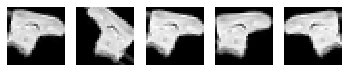

In [45]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [0]:
# python generators on runtime to save memory(Datagen)  

### Run the above model using fit_generator()

In [0]:
# generator object as input during the training time.

In [48]:
model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),   # for every images
                    steps_per_epoch=x_train.shape[0]/32,
                    epochs=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)   # check points to store models backup of weights after epochs. 

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1875.0 steps, validate on 10000 samples
Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.3512 - accuracy: 0.5005 - val_loss: 0.8215 - val_accuracy: 0.7106
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.1763 - accuracy: 0.5623 - val_loss: 0.8416 - val_accuracy: 0.7020
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.1117 - accuracy: 0.5873 - val_loss: 0.8590 - val_accuracy: 0.6890
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.0800 - accuracy: 0.5995 - val_loss: 0.8430 - val_accuracy: 0.6963
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.0489 - accuracy: 0.6126 - val_loss: 0.8663 - val_accuracy: 0.6824
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.0297 - accuracy: 0.6172 - val_loss: 0.8550 - 

###  Report the final train and validation accuracy

In [49]:
loss_and_metrics = model2.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 4s 70us/sample - loss: 0.7974 - accuracy: 0.7037
[0.7974332422097524, 0.7036833]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# image shifting different parameters 

datagen = ImageDataGenerator(horizontal_flip= True, vertical_flip = True, rotation_range=50)

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(x_train1)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

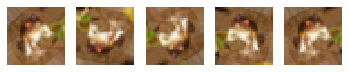

In [54]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train1[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'), cmap='gray')
    plt.plot()
plt.show()